# SCENE RECOGNITION MODEL

### Install and Import libraries

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [1]:
import tensorflow as tf 
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers

***
### Loading and Pre-processing the Dataset

In [2]:
data_dir = r"C:\Users\hudna\Downloads\IC\data"

In [3]:
os.listdir(data_dir)

['beach', 'forest', 'sky', 'street']

In [4]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 770 files belonging to 4 classes.


In [29]:
train = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150,150),
  batch_size=32)

Found 770 files belonging to 4 classes.
Using 616 files for training.


In [8]:
val = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150,150),
  batch_size=32)

Found 770 files belonging to 4 classes.
Using 154 files for validation.


In [48]:
#CLASS 0 BEDROOM
#CLASS 1 HIGHWAY
#CLASS 2 INDOOR
#CLASS 3 MOUNTAIN
#CLASS 4 SKY
#CLASS 5 OCEAN

C:\Users\hudna\anaconda3\envs\hello-tf\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


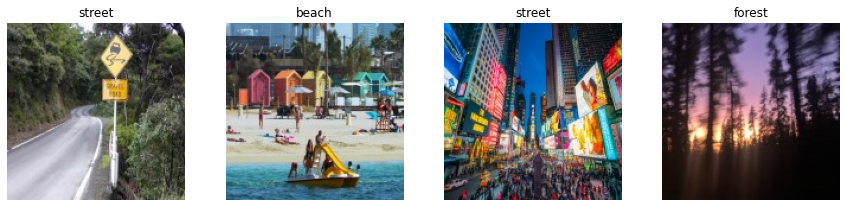

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in train.take(2):
  for i in range(4):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

***
### Building and Training the Model

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import load_model

In [64]:
model = Sequential()

In [65]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [66]:
model.compile(optimizer='adam', 
              loss= 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [67]:
model._name = "scene_classification"

In [68]:
model.summary()

Model: "scene_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
hist = model.fit(train, validation_data=val, batch_size= 32, epochs=50, callbacks=[early_stop])

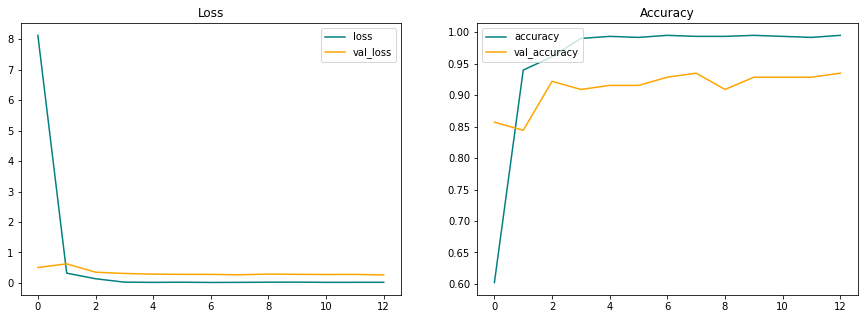

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].plot(hist.history['loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('Loss')
ax[0].legend(loc="upper right")

ax[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
ax[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('Accuracy')
ax[1].legend(loc="upper left")

plt.show()

***
### Testing and Saving the Model

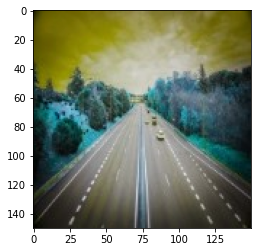

In [24]:
testimage=cv2.imread(r"C:\Users\hudna\Downloads\IC\dataold\highway\pexels-photo-1046227.jpeg")
testi=cv2.resize(testimage, (150,150))
testimg=np.expand_dims(testi,axis=0)
plt.imshow(testimage)
plt.show()

In [26]:
pred = model.predict(testimg)
print(pred)

[[1.1553284e-06 2.2887371e-10 2.5133951e-07 9.9999857e-01]]


In [27]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is street


In [23]:
model.save(r"C:\Users\hudna\Downloads\IC\models\scenerecognition.h5")

In [192]:
#new_model = load_model(r"C:\Users\hudna\Downloads\IC\models\scenerecognition.h5")